In [138]:
from google.colab import files
files=files.upload()

Saving Keyword_data - Keyword_data.csv to Keyword_data - Keyword_data (1).csv


Using melt and converting columns to rows

In [338]:
import pandas as pd
df=pd.read_csv("Keyword_data - Keyword_data.csv")
df=df.dropna(subset=['Title','Keyword 1'])
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
df_key_words=pd.melt(df,id_vars='Title',value_vars=['Keyword 1','Keyword 2','Keyword 3','Keyword 4','Keyword 5','Keyword 6','Keyword 7','Keyword 8','Keyword 9','Keyword 10','Keyword 11','Keyword 12'])
df_key_words

Title    variable  \
0    meta-analyses of financial performance and equ...   Keyword 1   
1    home country environments, corporate diversifi...   Keyword 1   
2    safeguarding investments in asymmetric interor...   Keyword 1   
3    managerialist and human capital explanations f...   Keyword 1   
4    bidding wars over r&d-intensive firms: knowled...   Keyword 1   
..                                                 ...         ...   
583  subsidiary staffing in multinational enterpris...  Keyword 12   
584  strategic human resource practices, top manage...  Keyword 12   
585  compensation policy and organizational perform...  Keyword 12   
586  functional background identity, diversity, and...  Keyword 12   
587  a customer interaction approach to strategy an...  Keyword 12   

                             value  
0                           equity  
1      diversification in industry  
2    interorganizational relations  
3           executive compensation  
4             knowledge management  
..                             ...  
583      host countries (business)  
584          industrial efficiency  
585          industrial management  
586       organizational sociology  
587             marketing strategy  

[588 rows x 3 columns]

Dropped rows having NAN values and finding unique keywords size

In [339]:
df_dropped=df_key_words.drop(df_key_words[df_key_words['value'].isna()==True].index,axis=0)
uni=len(df_dropped['value'].unique())
dff1=df_dropped.pivot(index='Title', columns='variable', values='value')

Using dictionary "dt" and mapping all the unique keywords to a specific value

In [340]:
dff=df_dropped["value"].unique()
dt={}
for i in range(len(dff)):
  dt[i+1]=dff[i]
dt

{1: 'equity',
 2: 'diversification in industry',
 3: 'interorganizational relations',
 4: 'executive compensation',
 5: 'knowledge management',
 6: 'emotions (psychology)',
 7: 'supervisors',
 8: 'industrial relations',
 9: 'decision making',
 10: 'corporate governance',
 11: 'executives',
 12: 'family-owned business enterprises',
 13: 'institutional investors',
 14: 'research & development',
 15: 'property',
 16: 'stock options',
 17: 'management science',
 18: 'aggression (psychology)',
 19: 'chief executive officers',
 20: 'mental fatigue',
 21: 'personnel management',
 22: 'product management',
 23: 'social capital (sociology)',
 24: 'organizational behavior',
 25: 'new products',
 26: 'leadership',
 27: 'teams in the workplace',
 28: 'labor supply',
 29: 'employees -- attitudes',
 30: 'work & family',
 31: 'human capital',
 32: 'social status',
 33: 'employee motivation',
 34: 'organizational change',
 35: 'creative ability',
 36: 'going public (securities)',
 37: 'international b

Creating an empty 2D array of unique keywords length size which is "len(dff)"

In [341]:
import numpy as np
a=dff1.to_numpy()
size=a.shape
b=[]
arr=np.zeros(shape=(len(dff), len(dff)),dtype='object')
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

Making Keyword pairs which are having links to each other

In [342]:
temp=np.empty(shape=(7644,2),dtype='object')
k=l=m=0
for i in range(size[0]):
  k=0
  while(k<size[1]):
    c=0
    x=a[i][k]
    if x==0:
      break
    else:
      for j in range(size[1]):
        if m==0 and c<(size[1]-1):
          temp[l][m]=x
          m=m+1
          c=c+1
        if(j!=k):
          temp[l][m]=a[i][j]
          m=m+1
          if m==2:
            m=0
            l=l+1
      k=k+1

temp



array([['organizational behavior', 'success in business'],
       ['organizational behavior', 'competitive advantage'],
       ['organizational behavior', 'organizational change'],
       ...,
       [None, None],
       [None, None],
       [None, None]], dtype=object)

From the temp array removing null value rows by converting into dataframe

In [343]:
x=pd.DataFrame(temp)
x.dropna(inplace=True)
temp1=x.to_numpy()

adjacency matrix

In [344]:
def get_key_from_value(d, val):
    keys = [k for k, v in d.items() if v == val]
    if keys:
        return keys[0]
    return None
n=temp1.shape
row=n[0]
col=n[1]
for i in range(row):
  x=[]
  for j in range(col):
    v=temp1[i][j]
    x.append(get_key_from_value(dt,v))
  arr[x[0]-1][x[1]-1]=arr[x[0]-1][x[1]-1]+1
df1 = pd.DataFrame(arr)
print(df1)

    0   1   2   3   4   5   6   7   8   9    ... 238 239 240 241 242 243 244  \
0     0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
1     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   1   
2     0   0   0   0   1   0   0   0   0   1  ...   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   0   0   2   2  ...   0   0   0   0   0   0   0   
4     0   0   1   0   0   0   0   0   1   2  ...   0   0   0   0   0   1   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
243   0   0   0   0   1   0   0   0   1   1  ...   0   0   0   0   0   0   0   
244   0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
245   0   0   0   0   0   0   0   1   0   0  ...   1   0   0   0   0   0   0   
246   0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   0   0   0   
247   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   1   0   0   

    245 246 247  
0     0   0   0  
1  

created weights

In [345]:
z=[]
for i in range(row):
  x=[]
  for j in range(col):
    v=temp1[i][j]
    x.append(get_key_from_value(dt,v))
  z.append(arr[x[0]-1][x[1]-1])
df2=pd.DataFrame(temp1,columns=["item1","item2"])
df2["weight"]=z
df2.sort_values(by=['weight'],ascending=False)

item1                         item2  weight
881   organizational effectiveness       organizational behavior      11
4706       organizational behavior  organizational effectiveness      11
1681       organizational behavior  organizational effectiveness      11
1462       organizational behavior  organizational effectiveness      11
1624  organizational effectiveness       organizational behavior      11
...                            ...                           ...     ...
1829        employees -- rating of            strategic planning       1
1830        employees -- rating of  organizational effectiveness       1
1831        employees -- rating of            management science       1
1832        employees -- rating of           management research       1
4877                    job stress         customer satisfaction       1

[4878 rows x 3 columns]

Plotting Weighted Network Graph

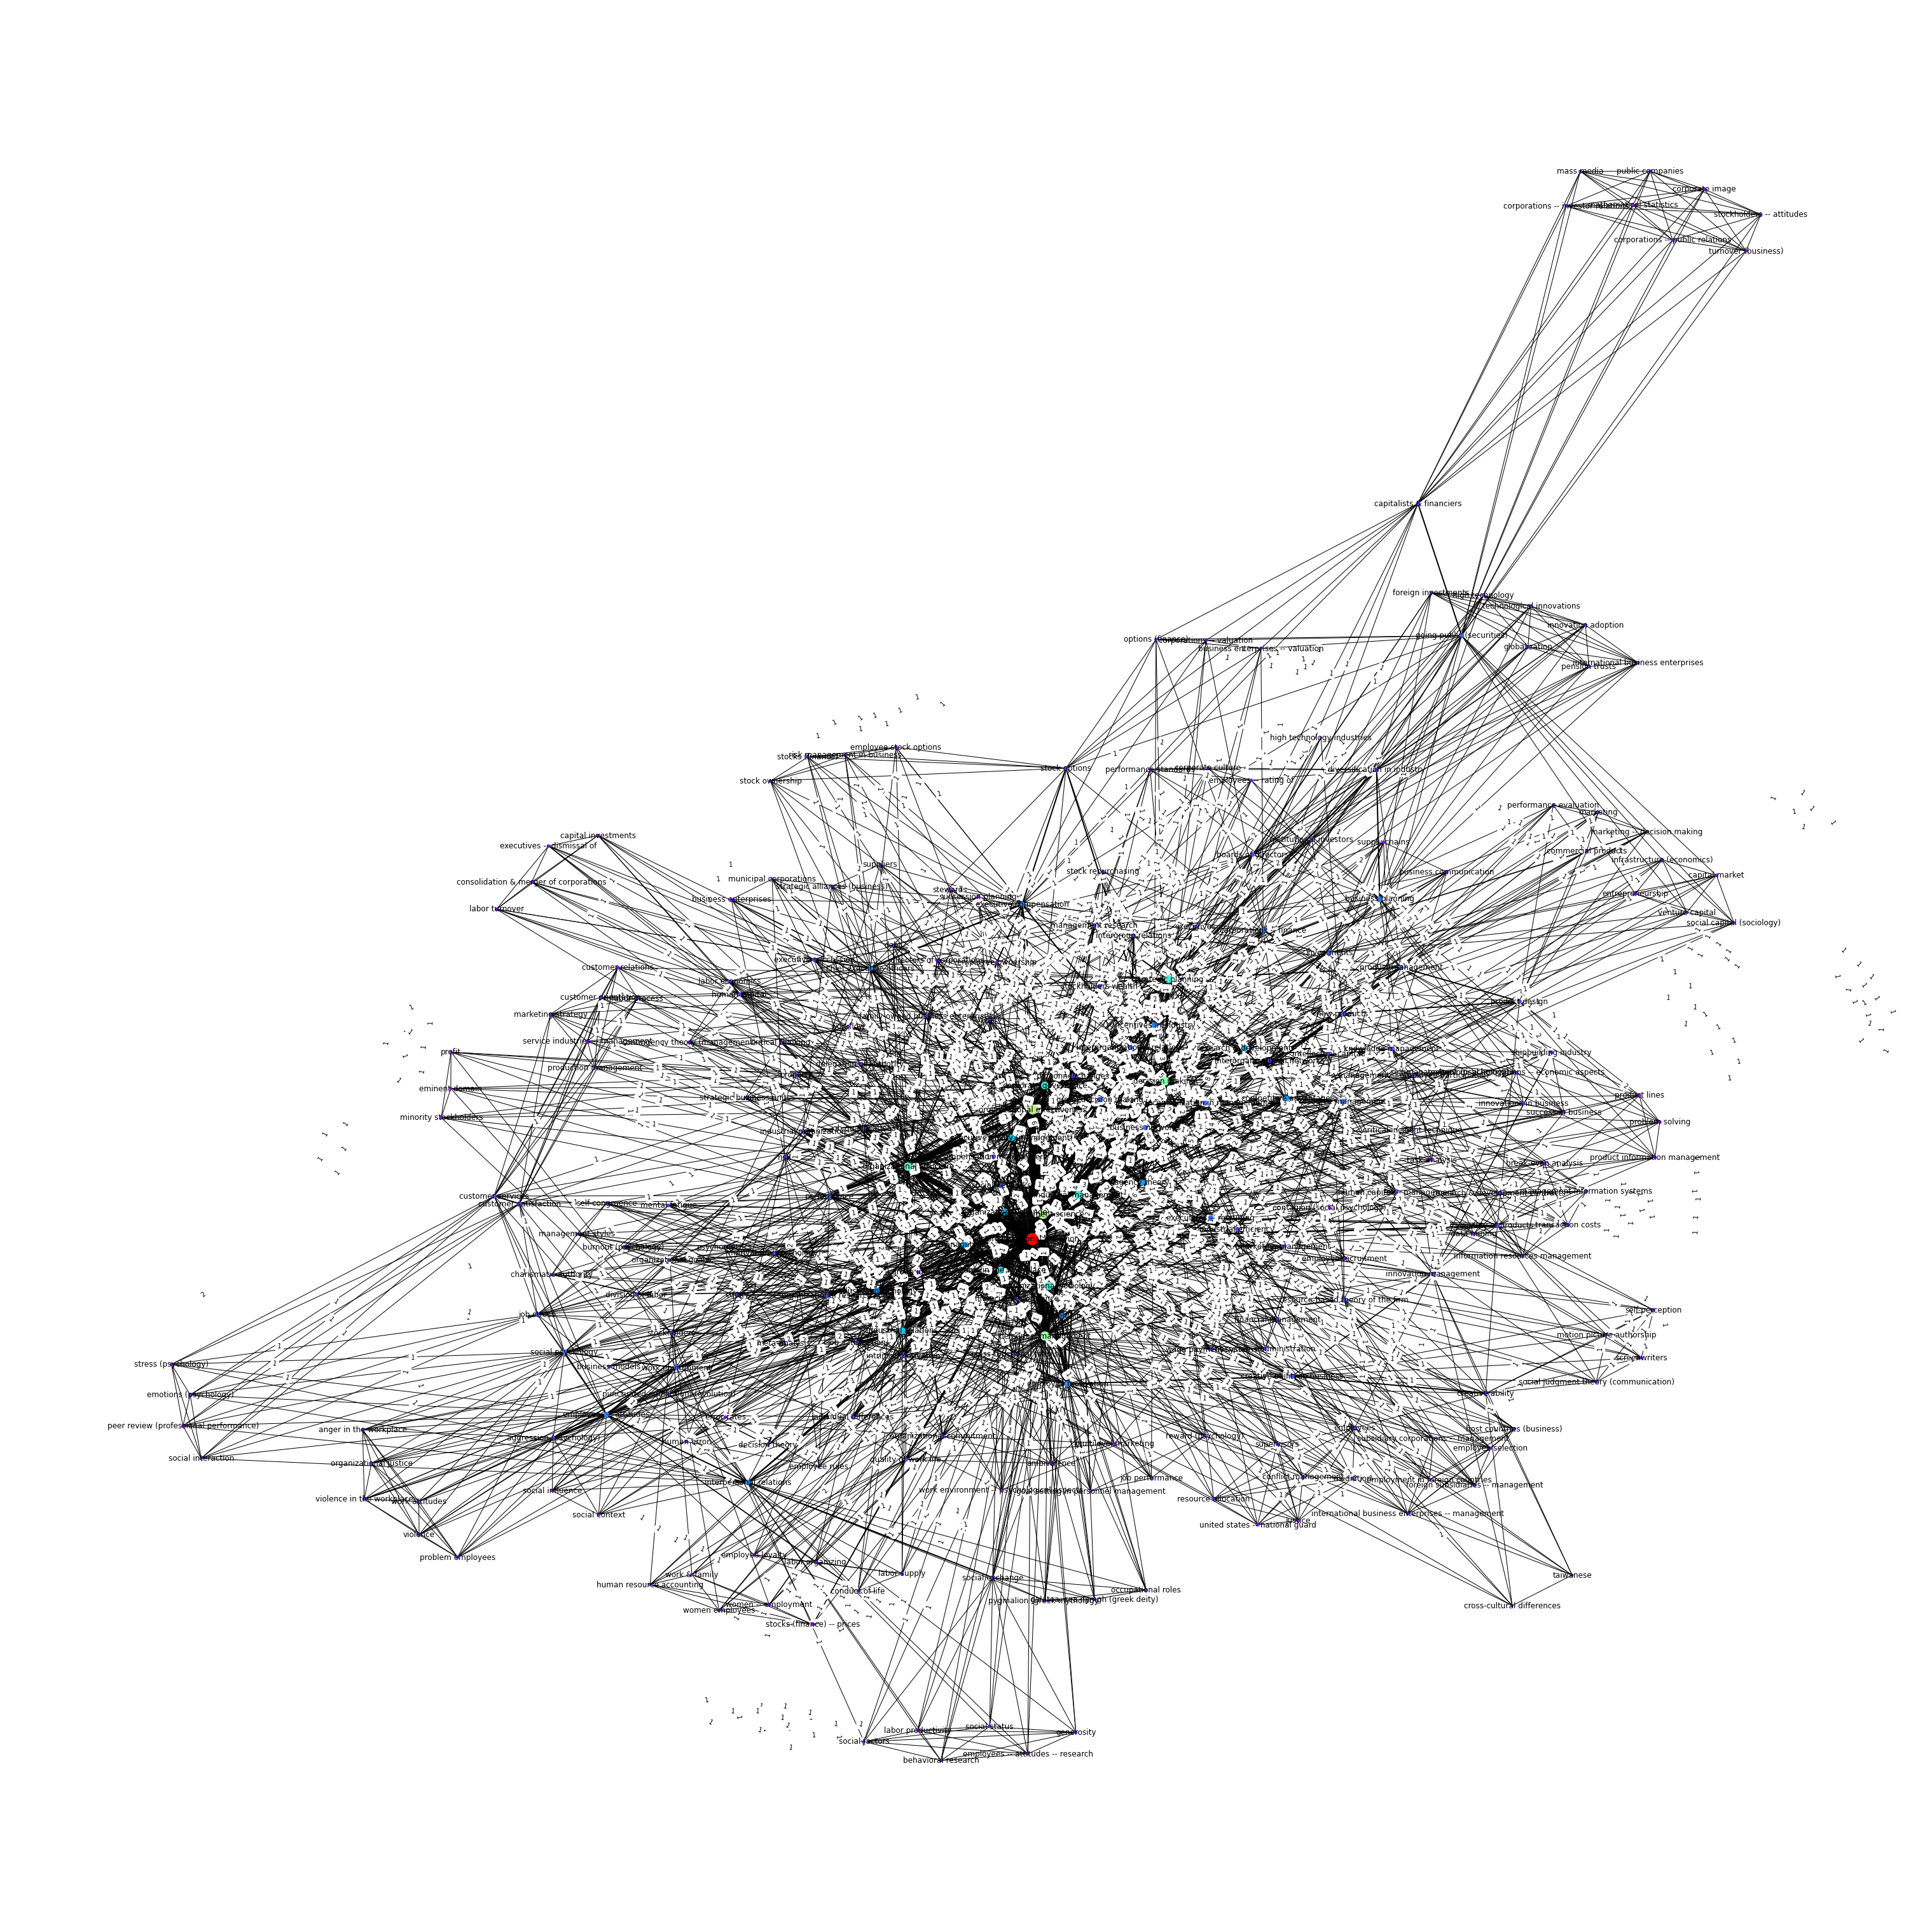

In [350]:
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
G = nx.from_pandas_edgelist(
    df2,
    source='item1',
    target='item2',
    edge_attr='weight'  # Set Edge Attribute to Weight Column
)
plt.figure(figsize=(42,42))
# Get Degree values and scale
scaled_degree = [d[1] * 2 for d in nx.degree(G)]
nx.draw(G,
        # Weights Based on Column
        width=list(nx.get_edge_attributes(G, 'weight').values()),
        # Node size based on degree
        node_size=scaled_degree,
        # Colour Based on Degree
        node_color=scaled_degree,
        # Set color map to determine colours
        cmap='rainbow',
        with_labels=True)
        
pos = nx.spring_layout(G)
weights = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.show()

computing node degree and strength

In [351]:
#computing node degree and strength
dd=[]
degree=[]
for k,v in G.degree:
  degree.append(v)
strength=[]
for k,v in G.degree(weight='weight'):
  strength.append(v)
  dd.append(k)

node_degree_strength = pd.DataFrame(columns=['Keyword','Degree','Strength'])
node_degree_strength['Keyword'] = dd#df_dropped['value'].unique()
node_degree_strength['Degree'] = degree
node_degree_strength['Strength'] = strength

node_degree_strength

Keyword  Degree  Strength
0                   organizational behavior     166       265
1                       success in business      11        11
2                     competitive advantage      37        42
3                     organizational change      48        60
4                   corporations -- finance      28        30
..                                      ...     ...       ...
243                             ambivalence       9         9
244                   emotions (psychology)       9         9
245  peer review (professional performance)       9         9
246                     stress (psychology)       9         9
247                      social interaction       9         9

[248 rows x 3 columns]

Top 10 nodes by degree

In [352]:
# top 10 nodes by degree
node_degree_strength.drop('Strength',axis=1).sort_values(by='Degree',ascending=False).iloc[0:10,:2]

Keyword  Degree
0        organizational behavior     166
23  organizational effectiveness     104
38            management science     102
65          personnel management      93
21               decision making      90
61      organizational structure      74
18            strategic planning      66
74      organizational sociology      66
6          industrial management      64
53          corporate governance      62

Top 10 nodes by strength

In [353]:
# top 10 nodes by strength
node_degree_strength.drop('Degree',axis=1).sort_values(by='Strength',ascending=False).iloc[0:10,:]

Keyword  Strength
0        organizational behavior       265
23  organizational effectiveness       144
38            management science       136
65          personnel management       126
21               decision making       112
61      organizational structure       107
74      organizational sociology        96
53          corporate governance        85
6          industrial management        84
18            strategic planning        80

In [378]:
#top 10 node pairs by weight

top_10_weights = dict(df1.max())

#creating a dataframe for keyword pair and weight
keyword_pair_weight=pd.DataFrame(columns=['Keyword1','Keyword2','Weight'])

keyword1_list=[]
keyword2_list = []
weight_list=[]
keyword1_list1=[]
keyword2_list1 = []
#appending the keywords and weight from adjacency matrix to keyword_pair_weight dict
for key,value in top_10_weights.items():
  keyword1_list.append(key)
  keyword2_list.append(df1[df1[key].where(df1[key]==value).notnull()].index[0])
  weight_list.append(value)

for i in range(len(keyword1_list)):
  keyword1_list1.append(dt[keyword1_list[i]+1])
for i in range(len(keyword2_list)):
  keyword2_list1.append(dt[keyword2_list[i]+1])


keyword_pair_weight['Keyword1'] = keyword1_list1
keyword_pair_weight['Keyword2'] = keyword2_list1
keyword_pair_weight['Weight'] = weight_list

keyword_pair_weight.sort_values(by=['Weight'],ascending=False).head(10)

Keyword1                      Keyword2  Weight
112  organizational effectiveness       organizational behavior      11
23        organizational behavior  organizational effectiveness      11
156      organizational structure       organizational behavior       9
20           personnel management       organizational behavior       8
16             management science       organizational behavior       7
8                 decision making       organizational behavior       6
9            corporate governance       organizational behavior       6
40       organizational sociology       organizational behavior       6
7            industrial relations       organizational behavior       5
145                    management       organizational behavior       5

Plotting Average Strength vs Degree Graph

Text(0, 0.5, 'Average Strength')

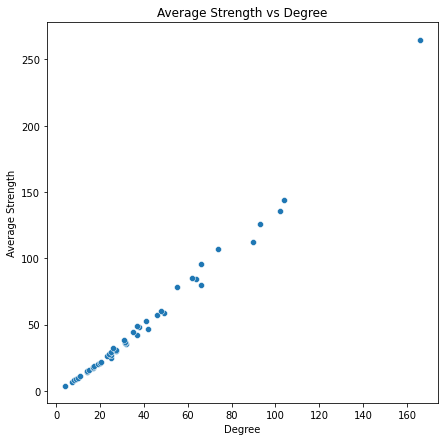

In [379]:
# Average Strength vs Degree.
import seaborn as sns
plt.figure(figsize=(7,7))
avg_strength = node_degree_strength.groupby('Strength').mean()
sns.scatterplot(data=avg_strength,y=avg_strength.index,x='Degree')
plt.title('Average Strength vs Degree')
plt.xlabel('Degree')
plt.ylabel('Average Strength')